# Analyzing Ford Go Bike's data - Feb 2019

Definitions:

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer)

## Gathering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt

In [2]:
df = pd.read_csv(("full-201902-fordgobike.csv"), dtype={'start_station_id':str,'end_station_id':str})

## Assessing

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Quality issues

Fill empty values

Change bike_id from int64 to object

#### Tidiness issues

Seperate date and time

## Cleaning

In [5]:
# Make a new dataset df1
df1 = df

#### Fill empty values

Code

In [6]:
df1 = df1.fillna(0)

Test

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  object 
 4   start_station_name       183412 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  object 
 8   end_station_name         183412 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        183412 non-null  float64
 14  memb

#### Change bike_id from int64 to object

Code

In [80]:
df1['bike_id'] = df1['bike_id'].astype(str)

Test

In [81]:
print(df1['bike_id'].dtypes)

object


#### Change member birth year to int

Code

In [10]:
df1['member_birth_year'] = df1['member_birth_year'].astype(int)

Check

In [11]:
print(df1['member_birth_year'].dtypes)

int32


#### Change start_time and end_time to date and time

Code

In [12]:
df1['start_time'] = pd.to_datetime(df.start_time)

In [13]:
df1['end_time'] = pd.to_datetime(df.end_time)

Test

In [14]:
print(df1['start_time'].dtypes)

datetime64[ns]


In [15]:
print(df1['end_time'].dtypes)

datetime64[ns]


#### Seperate start_time and end_timeto hour, date, day, month and year

Code

In [16]:
df1['start_hour'] = df1.start_time.dt.strftime('%H:%M')
df1['start_date'] = df1.start_time.dt.strftime('%Y-%m-%d')
df1['start_day'] = df1.start_time.dt.strftime('%A')

In [17]:
df1['end_hour'] = df1.end_time.dt.strftime('%H:%M')
df1['end_date'] = df1.end_time.dt.strftime('%Y-%m-%d')
df1['end_day'] = df1.end_time.dt.strftime('%A')

Test

In [18]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_date,start_day,end_hour,end_date,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17:32,2019-02-28,Thursday,08:01,2019-03-01,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,Customer,0,0,No,18:53,2019-02-28,Thursday,06:42,2019-03-01,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12:13,2019-02-28,Thursday,05:24,2019-03-01,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17:54,2019-02-28,Thursday,04:02,2019-03-01,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23:54,2019-02-28,Thursday,00:20,2019-03-01,Friday


## Visualization

### Time

In [99]:
time = df1[['start_date','end_date','duration_sec','start_hour','end_hour','start_day','end_day']]
time.head()

,start_date,end_date,duration_sec,start_hour,end_hour,start_day,end_day
0,2019-02-28,2019-03-01,52185,17:32,08:01,Thursday,Friday
1,2019-02-28,2019-03-01,42521,18:53,06:42,Thursday,Friday
2,2019-02-28,2019-03-01,61854,12:13,05:24,Thursday,Friday
3,2019-02-28,2019-03-01,36490,17:54,04:02,Thursday,Friday
4,2019-02-28,2019-03-01,1585,23:54,00:20,Thursday,Friday


#### Total trips by week days

In [83]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [84]:
start_day = pd.DataFrame(time['start_day'].value_counts(), index=day)
end_day = pd.DataFrame(time['end_day'].value_counts(), index=day)
trip_per_day = pd.concat([start_day, end_day], axis=1)
trip_per_day['total'] = (trip_per_day['start_day'] + trip_per_day['end_day'])
trip_per_day

,start_day,end_day,total
Monday,26852,26859,53711
Tuesday,31813,31820,63633
Wednesday,29641,29631,59272
Thursday,35197,35185,70382
Friday,28981,28981,57962
Saturday,15405,15413,30818
Sunday,15523,15523,31046


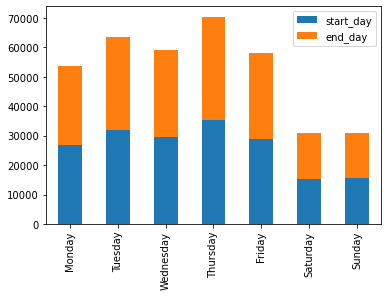

In [85]:
trip_per_day[['start_day','end_day']].plot(kind='bar', stacked=True)

Thursdays have highest number of trips with a total of 70382. Follwing by Tuesdays with 63,633 trips. On Mondays, Wednesdays and Fridays have somewhere from 53,000 to over 59,000 trips.

Saturday and Sunday have significantly lower trips than weekdays with only 30,818 and 31,046 trips respectively which are half of the total trips on Tuesdays and less than half of total trips on Thursdays. 

One of the reason this happens could be the majority of users only come to San Francisco during weekdays to work or use Ford bikes to commute to work. One thing Ford can do to boost the bikes usage during weekend is targeting tourists who usually spend weekends in San Francisco.

#### Average duration by week days

In [87]:
day_duration = pd.DataFrame(time.groupby(by=['start_day']).mean(), index=day)
day_duration

,duration_sec
Monday,713.159616
Tuesday,663.305567
Wednesday,673.671165
Thursday,699.040998
Friday,695.795073
Saturday,902.661993
Sunday,919.746054


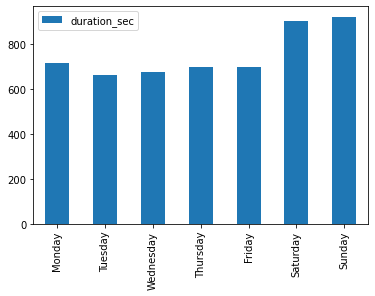

In [72]:
day_duration.plot(kind='bar')

### Demography

In [25]:
demo = df1[['duration_sec','user_type','member_birth_year','member_gender','bike_share_for_all_trip']]
demo = demo.rename(columns={'member_birth_year':'birth_year', 'member_gender':'gender', 'bike_share_for_all_trip':'bike_share'})
demo

,duration_sec,user_type,birth_year,gender,bike_share
0,52185,Customer,1984,Male,No
1,42521,Customer,0,0,No
2,61854,Customer,1972,Male,No
3,36490,Subscriber,1989,Other,No
4,1585,Subscriber,1974,Male,Yes
...,...,...,...,...,...
183407,480,Subscriber,1996,Male,No
183408,313,Subscriber,1984,Male,No
183409,141,Subscriber,1990,Male,Yes
183410,139,Subscriber,1988,Male,No


#### Members' birth years

In [50]:
demo = demo[demo['birth_year'] >= 1926]

In [51]:
demo['birth_year'].unique()

array([1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990,
       1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973,
       1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969, 1963,
       1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960, 1970,
       1956, 1957, 1945, 1952, 1948, 1951, 1941, 1950, 1949, 1953, 1955,
       1946, 1947, 1931, 1943, 1942, 1933, 2001, 1944, 1928, 1934, 1939,
       1930, 1938, 1927])

In [53]:
generation = {'User':[(demo['birth_year'] <= 1945).sum(),
              ((demo['birth_year'] >= 1946) & (demo['birth_year'] <= 1965)).sum(),
              ((demo['birth_year'] >= 1966) & (demo['birth_year'] <= 1980)).sum(),
              ((demo['birth_year'] >= 1981) & (demo['birth_year'] <= 1995)).sum(),
              (demo['birth_year'] >= 1996).sum(),
             (demo['birth_year']>=1926).sum()]}
gen_axis = ['Silent', 'Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Total']
generation = pd.DataFrame(generation, index=gen_axis)
generation 

,User
Silent,295
Baby Boomer,10254
Gen X,35062
Gen Y,113892
Gen Z,15569
Total,175072


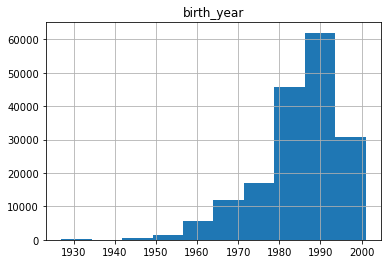

In [59]:
demo.hist(column='birth_year');

Although the Silent generation only makes up a very small part of the total users (only 0.001%), it would be cool for Ford Go Bike to use this data to show the diversity in user age span, or even run a marketing campaign based on real customers' testimonials to show how simple and smooth the product is that even your grandma and grandpa would ride them.

Baby Boomers makes up of 6% of the total users pool with 10,254 users. Following is Gen Z with 15,569 users which is 9% of the users pool. Gen X makes up 1/5th of users pool with 15,569 users.

The majority of users are Gen Y with 112,892 which is 65% of the pool.

Ford may want to run more marketing campaigns targeting Bababy Boomers, Gen Z and Gen X to attract more users from this age group.

#### Duration span by gender

In [30]:
demo = demo[demo['gender'] != 0]

In [31]:
gender = demo.groupby(by='gender').mean()
gender = gender[['duration_sec']]
gender

,duration_sec
gender,
Female,779.147637
Male,672.639883
Other,996.589154


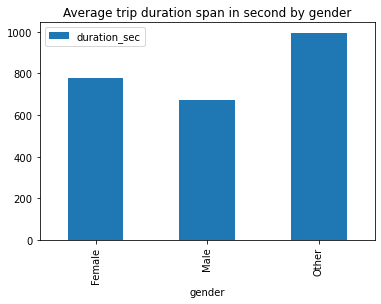

In [56]:
gender.plot(kind='bar', title='Average trip duration span in second by gender')

Bikers who identified their genders as 'Other' has the highest average duration span of 997 seconds or around 16.5 minutes.

Female bikers has the average trip span of 779 which is equivalent to 13 minutes.

Male bikers has the shortest trip span of 672 seconds or 11 minutes.

This could be Male bikers take shorter distance trips than Other and Female bikers, or it could be Male bikers have higher average speed. In order to investigate this indeth, we would need more data on trip distance and average speed.

#### User types by gender

In [33]:
df_user = {'customer':[((demo['user_type'] == 'Customer') & (demo['gender'] == 'Other')).sum(), ((demo['user_type'] == 'Customer') & (demo['gender'] == 'Female')).sum(), ((demo['user_type'] == 'Customer') & (demo['gender'] == 'Male')).sum()],
        'subscriber':[((demo['user_type'] == 'Subscriber') & (demo['gender'] == 'Other')).sum(), ((demo['user_type'] == 'Subscriber') & (demo['gender'] == 'Female')).sum(), ((demo['user_type'] == 'Subscriber') & (demo['gender'] == 'Male')).sum()]}
gender_index = ['Other','Female', 'Male']
df_user = pd.DataFrame(df_user, index=gender_index)
df_user

,customer,subscriber
Other,455,3196
Female,4646,36184
Male,11525,119066


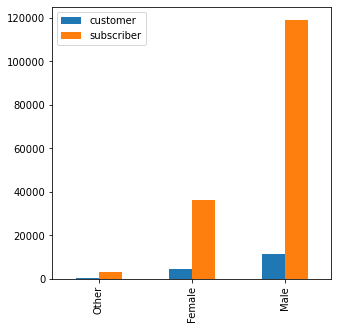

In [34]:
df_user.plot(kind='bar', figsize=(5,5))

Compared to number of customers, number of subcribers are over 7 times higher in Other, over 8 times higher in Female, and over 10 times higher in Male. On average, number of subcribers is 8.5 higher than number of customers. This is a good metric to have as more subscribers mean higher user retention, user returns and life time values.

However, the number of Male customers is 2.5 times higher than Female customers and is 25 times higher than Other customers; And the number of Male subscribers is 3 times higher than Female subscribers, and is 38 times higher than Other subscribers, despite Other and Female have higher trip duration on average.

Ford Go Bike service clearly attracts more Male users than Female and Other users. Ford Go Bike team should do in-depth persona research and user interviews to find out why their product and service do not attract Female and Other users that well.

### Location

In [35]:
# create a new dataset from df1 for this 
# only keep rows where start_station_id & end_station_id != 0
df2 = df1[(df1.start_station_id != '0') & (df1.end_station_id != '0')]

In [36]:
station_array = df2['start_station_name'].unique()

In [37]:
# crate two new datasets for start_station_name and end_station_name values
# reorganize the station names by sorting index
start_station = pd.DataFrame(df2['start_station_name'].value_counts(), index=station_array)
end_station = pd.DataFrame(df2['end_station_name'].value_counts(), index=station_array)

In [38]:
# combine thew two datasets start_station and end_station by index
station = pd.concat([start_station, end_station], axis=1)
# change column names to start and end
station = station.rename(columns={'start_station_name':'start', 'end_station_name':'end'})
# create column total calculating the sum of start and end
station['total'] = station['start'] + station['end']
# view the station with most visits to least by sprting total with ascending == False
station = station.sort_values(by='total', ascending=False)

station

,start,end,total
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544,4857,8401
Market St at 10th St,3904,3973,7877
Montgomery St BART Station (Market St at 2nd St),2895,3647,6542
San Francisco Ferry Building (Harry Bridges Plaza),2710,3368,6078
Berry St at 4th St,3052,2872,5924
...,...,...,...
Parker Ave at McAllister St,7,9,16
Willow St at Vine St,9,5,14
Palm St at Willow St,4,7,11
21st Ave at International Blvd,4,6,10


In [39]:
station.describe()

,start,end,total
count,330.000000,330.000000,330.000000
mean,555.793939,555.793939,1111.587879
std,580.327064,629.439781,1204.842057
min,2.000000,5.000000,8.000000
25%,158.500000,163.500000,319.500000
50%,388.500000,370.500000,762.000000
75%,772.000000,764.750000,1520.500000
max,3904.000000,4857.000000,8401.000000


#### Stations have have the total visits of more than 5000

In [40]:
most_visited = station[station['total'] > 5000]

In [41]:
most_visited

,start,end,total
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544,4857,8401
Market St at 10th St,3904,3973,7877
Montgomery St BART Station (Market St at 2nd St),2895,3647,6542
San Francisco Ferry Building (Harry Bridges Plaza),2710,3368,6078
Berry St at 4th St,3052,2872,5924
Powell St BART Station (Market St at 4th St),2760,2997,5757
San Francisco Caltrain (Townsend St at 4th St),2703,2947,5650


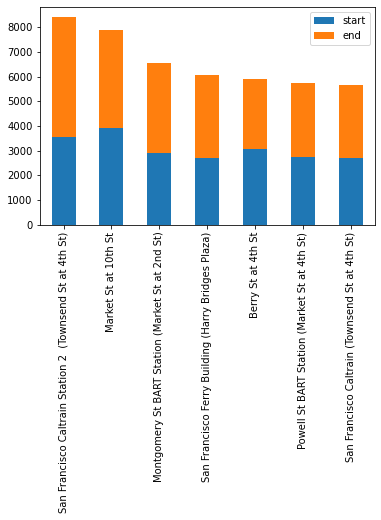

In [42]:
most_visited[['start','end']].plot(kind='bar', stacked=True)

These are the 7 most profitable stations of Ford Go Bike with over 5000 visits.

San Francisco Caltrain Station 2 (Townsned St at 4th St) is the most popular destination with 8401 visits.
Come second is Market St at 10th St with 7877 visits. 

Third on the most visited list is Montgomery St BART Station (Market St at 2nd St) with 6542 visits, and is followed by San Francisco Ferry Building (Harry Bridges Plaza) with 6078.


Berry St at 4th St, Powell St BART Station (Market St at 4th St), and San Francisco Caltrain (Townsend St at 4th St) come in 5th, 6th and 7th with 5924, 5757 and 5650 visits respectively.

Ford may want to collect more data on the wait time to get a bike at these top 7 most visited stations to see if there are longer wait times for users. If there're, Ford may want to add more bikes to these stations.

#### Stations have have the total visits of less than 50

In [43]:
least_visited = station[station['total'] < 50]

In [44]:
least_visited

,start,end,total
San Pedro St at Hedding St,19,30,49
Williams Ave at Apollo St,25,20,45
Foothill Blvd at 42nd Ave,23,20,43
Farnam St at Fruitvale Ave,18,20,38
26th Ave at International Blvd,19,19,38
Backesto Park (Jackson St at 13th St),17,21,38
23rd Ave at Foothill Blvd,18,20,38
Leavenworth St at Broadway,17,12,29
Taylor St at 9th St,13,11,24
Parker Ave at McAllister St,7,9,16


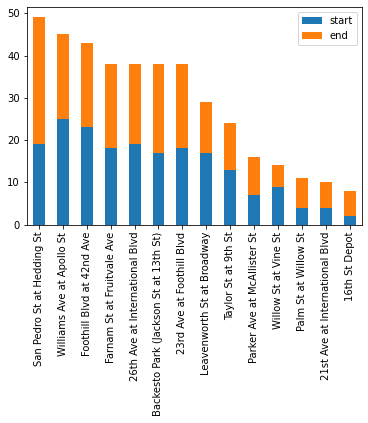

In [45]:
least_visited[['start','end']].plot(kind='bar', stacked=True)

San Pedro St at Hedding St, Williams Ave at Apollo St and Foothill Blvd at 42nd Ave only have 49, 45 and 43 total visits respectively.

23rd Ave at Foothill Blvd, Backesto Park (Jackson St at 13th St), Farnam St at Fruitvale Ave, and 26th Ave at International Blvd all share the total visits of 38.

The rest of the stations in the list have less than 30 visits.

Ford may want to reconsider whether to continue operate the 14 stations above than have less than 50 visits a month like this. Considering the financially aspect, these stations are potentially operating at a loss. Second, considering customer service, not many customers would be swayed away if these 14 stations were to closed down. Lastly, considering the marketing aspect, these stations do not help with brand awareness or engagement as they surely do not attract enough users.